<a href="https://colab.research.google.com/github/sasansharee/Sasan_MMA_Assisgnments/blob/main/ML_Regression_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Load Boston Data Set from sklearn.datasets
*   Assign data to X and target to y
*   Check the shape of the dataset
*   Plot the scatter plot of each attribute versus MEDV

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df = pd.read_csv('/content/boston_house_prices.csv')

In [76]:
df.shape

(506, 14)

In [77]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [78]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

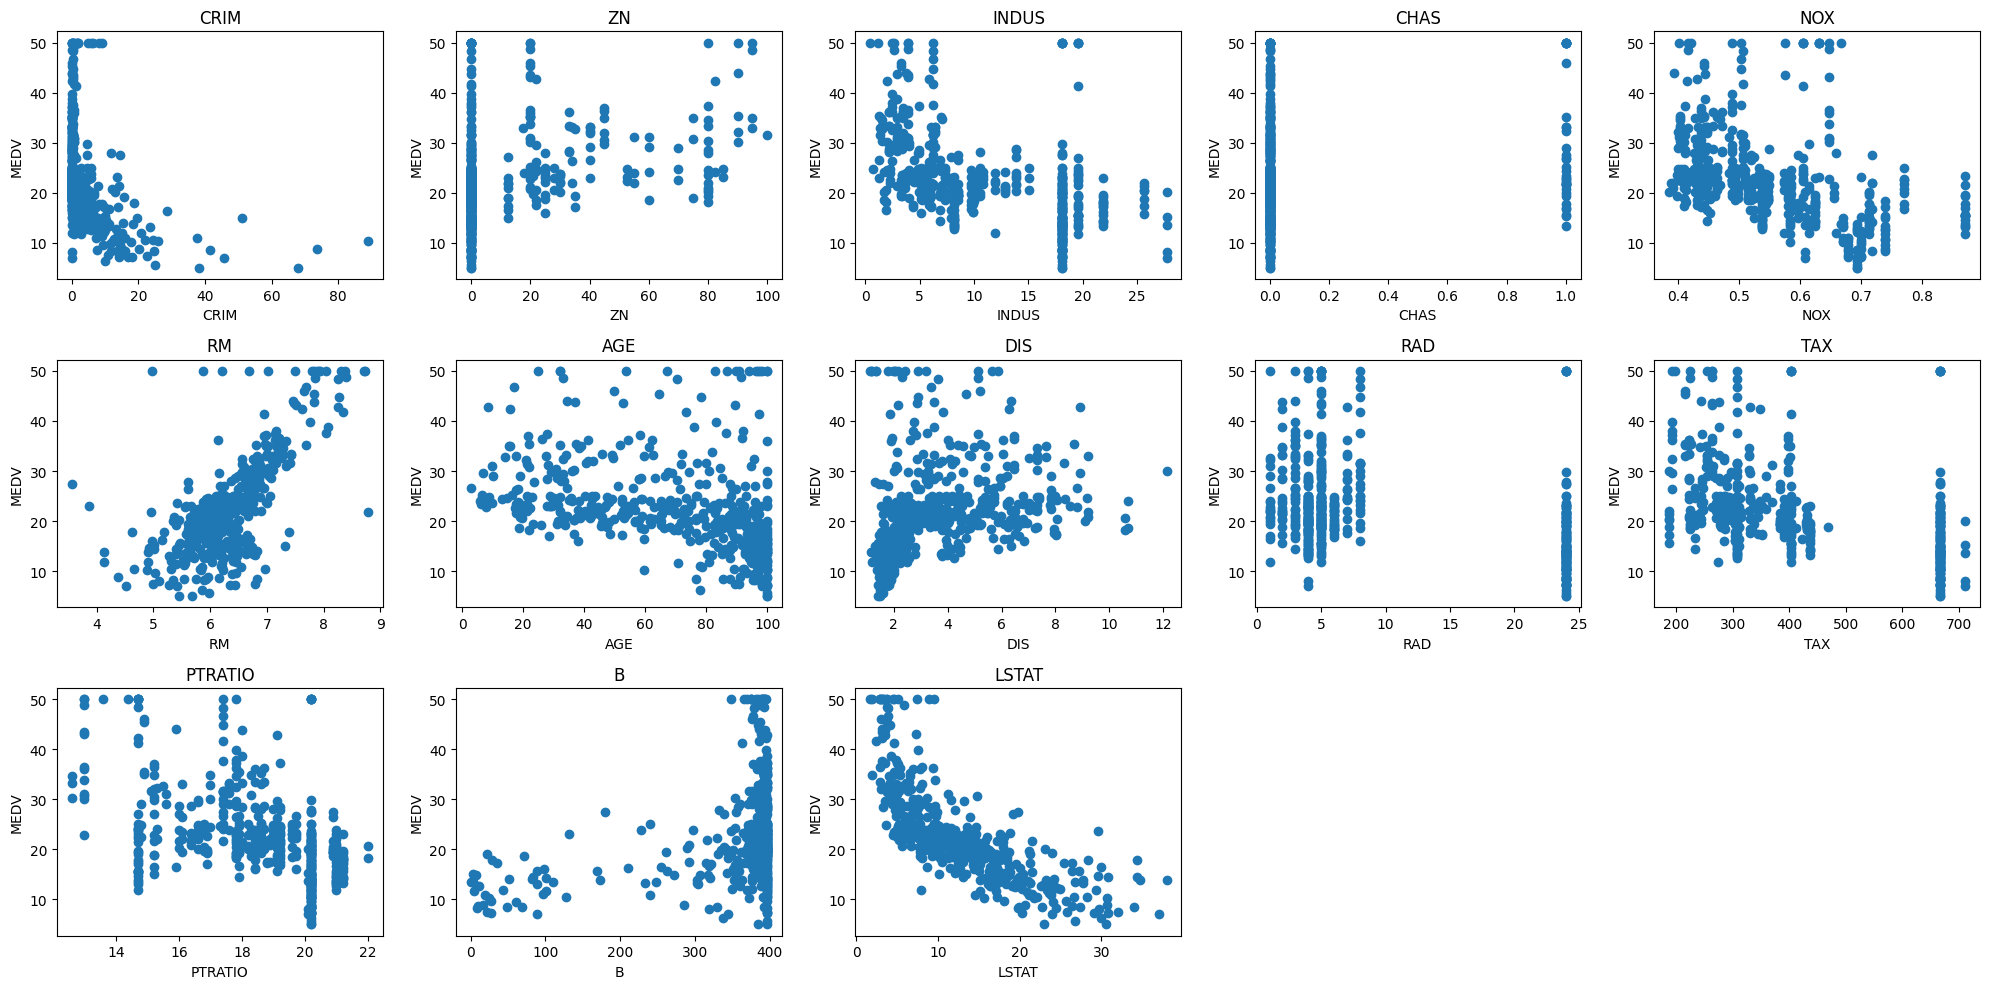

In [79]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))

for i, ax in enumerate(axes.ravel()):
  if i > 12:
    ax.set_visible(False)
    continue
  ax.scatter(X.iloc[:, i], y)
  ax.set_xlabel(X.columns[i])
  ax.set_title(X.columns[i])
  ax.set_ylabel('MEDV')

plt.tight_layout()
plt.show()

* Split the dataset into test and train datasets, you can set the random seed to 42 by random_state=42
* run cross validation for the train and test datasets for cv=10
* print the mean score for the cross validation using linear regressor (LinearRegressor())
* do the same two steps above for random forest regressor



In [80]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [81]:
X_new = df.drop('MEDV', axis=1)
y_new = df['MEDV']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, random_state=42)

In [83]:
cross_val_LR = cross_val_score(LinearRegression(), X_train, y_train, cv=10)
print(cross_val_LR.mean())

0.7160579492011186


In [84]:
cross_val_RF = cross_val_score(RandomForestRegressor(), X_train, y_train, cv=10)
print(cross_val_RF.mean())

0.8444840744228017


* Transform the Boston House dataset and split the dataset into test and train datasets
* Run cross-validation
* Plot the coefficients of the model






In [85]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [86]:
X_new = df.drop('MEDV', axis=1)
y_new = df['MEDV']

In [87]:
X_new.shape

(506, 13)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, random_state=42)

In [89]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [90]:
X_train_poly.shape, y_train.shape

((379, 104), (379,))

In [91]:
X_test_poly.shape, y_test.shape

((127, 104), (127,))

In [92]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

LinearRegression()

In [93]:
lr.score(X_train_poly, y_train)

0.9447733458074402

In [94]:
cross_val_poly_LR = cross_val_score(lr, X_train_poly, y_train, cv=10)
print(cross_val_poly_LR.mean())

0.8028568309833306


In [95]:
lr.score(X_test_poly, y_test)

0.7912062273364698

In [96]:
lr.coef_.shape

(104,)

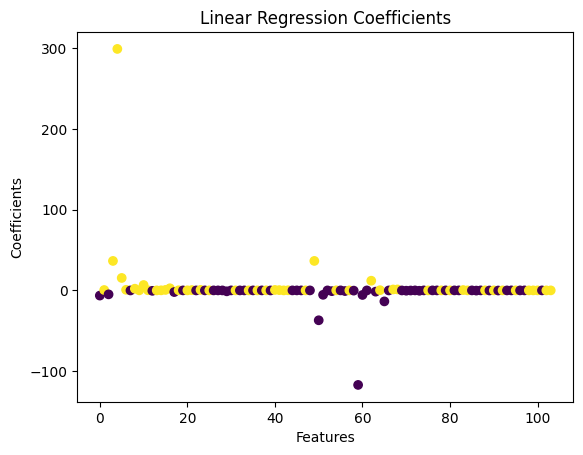

In [97]:
plt.scatter(range(lr.coef_.shape[0]), lr.coef_, c = np.sign(lr.coef_))
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Linear Regression Coefficients')
plt.show()

In [98]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [99]:
X_new = df.drop('MEDV', axis=1)
y_new = df['MEDV']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, random_state=42)

In [101]:
pipe = Pipeline(steps = [('scalr', StandardScaler()),
                         ('imputer', SimpleImputer()),
                         ('poly', PolynomialFeatures(degree = 2, include_bias= False))])

In [102]:
X_train_poly = pipe.fit_transform(X_train)
X_test_poly = pipe.transform(X_test)

In [103]:
lr_new = LinearRegression()
lr_new.fit(X_train_poly, y_train)

LinearRegression()

In [104]:
lr_new.score(X_train_poly, y_train)

0.94477334580744

In [105]:
cross_val_pipe = cross_val_score(lr_new, X_train_poly, y_train, cv=10)
print(cross_val_pipe.mean())

0.8028568309839844


In [106]:
lr_new.score(X_test_poly, y_test)

0.7912062272918664

Text(0.5, 1.0, 'Linear Regression Coefficients')

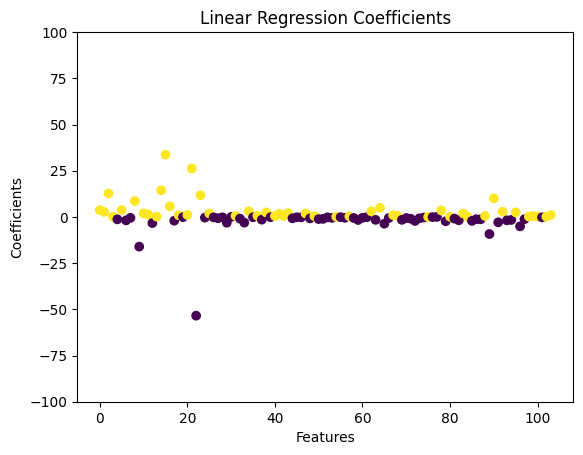

In [107]:
plt.scatter(range(lr_new.coef_.shape[0]), lr_new.coef_, c = np.sign(lr_new.coef_))
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.ylim(-100, 100)
plt.title('Linear Regression Coefficients')